# Perform a basic first pass on 'Zhou et al. Band gap data'

## Import the libraries we will be using

In [40]:
# read in data with pandas
import pandas as pd
# use numpy for vector and matrix operations
import numpy as np

# composition is a custom made python file that generates composition-based feature vectors (CBFV)
import composition
# utils is a custom made python file that has some useful functions
import utils

# make nice figures
import matplotlib.pyplot as plt
# machine learnign algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Process the data and get it formated for machine learning

In [27]:
# read in band gap data from Zhou et al. publication:
# J. Phys. Chem. Lett., 2018, 9 (7), pp 1668–1673
#DOI: 10.1021/acs.jpclett.8b00124
#Publication Date (Web): March 13, 2018
df_band_gap = pd.read_excel('jz8b00124_si_002.xlsx')

In [28]:
df_band_gap.head()

,composition,Eg (eV)
0,Hg0.7Cd0.3Te,0.350
1,CuBr,3.077
2,LuP,1.300
3,Cu3SbSe4,0.400
4,ZnO,3.436


In [29]:
# rename columns for use with feature generation
df_band_gap.columns = ['formula', 'target']

## Featurize the data

In [30]:
X, y, formula = composition.generate_features(df_band_gap)

The element: Eu from formula EuYb2Se4 is not currently supported in our database
The element: Eu from formula Ba3EuP3O12 is not currently supported in our database
The element: Eu from formula EuSb4S7 is not currently supported in our database
The element: Eu from formula Na0.75Eu1.625GeSe4 is not currently supported in our database
The element: Eu from formula EuBiW2O9 is not currently supported in our database
The element: Eu from formula Sr3EuP3O12 is not currently supported in our database
The element: Eu from formula Eu3Sb4S9 is not currently supported in our database
The element: Eu from formula EuHo2Se4 is not currently supported in our database
The element: Eu from formula Na2EuGeSe4 is not currently supported in our database
The element: Eu from formula EuLiH3 is not currently supported in our database
The element: Eu from formula Eu2Se3 is not currently supported in our database
The element: Eu from formula EuO is not currently supported in our database
The element: Eu from f

There was an error with the formula: "Ba2LiFe2N3,15", please check the formatting
There was an error with the formula: "P2H12N7Cl,2", please check the formatting
There was an error with the formula: "Te3MoWS,156", please check the formatting
There was an error with the formula: "Nb4Co2PdSe12,12", please check the formatting
The element: Eu from formula EuPPt is not currently supported in our database
The element: Pm from formula PmCdPd2 is not currently supported in our database
There was an error with the formula: "MgCo2(PO5)2,70", please check the formatting
There was an error with the formula: "Sr2Cu(ClO)2,139", please check the formatting
There was an error with the formula: "RbNa2NiO2,139", please check the formatting
There was an error with the formula: "Li5Mn3(FeO5)2,2", please check the formatting
The element: Eu from formula EuSbO3 is not currently supported in our database
There was an error with the formula: "Li3Ni(SbO3)4,1", please check the formatting
There was an error wi

There was an error with the formula: "Cs2NaMnF6,166", please check the formatting
The element: Eu from formula EuAl2Au2 is not currently supported in our database
There was an error with the formula: "Li2Fe2(PO4)3,15", please check the formatting
There was an error with the formula: "TiCr3(PO4)6,146", please check the formatting
There was an error with the formula: "Cs2NaCoF6,166", please check the formatting
There was an error with the formula: "Li2MnCu3O8,212", please check the formatting
There was an error with the formula: "Ca3Cu2(ClO2)2,139", please check the formatting
There was an error with the formula: "LiCuPO4,63", please check the formatting
There was an error with the formula: "Zr6Al2CoH10,190", please check the formatting
There was an error with the formula: "Te2Mo(WS2)3,156", please check the formatting
There was an error with the formula: "ZnCu3P3O13,11", please check the formatting
The element: Eu from formula EuP2Os2 is not currently supported in our database
There was

There was an error with the formula: "Sr3ScNiO6,167", please check the formatting
The element: Eu from formula EuClO is not currently supported in our database
The element: Eu from formula Eu2TeO2 is not currently supported in our database
There was an error with the formula: "LiCu5P3O13,2", please check the formatting
There was an error with the formula: "Li4Mn5Nb3O16,1", please check the formatting
There was an error with the formula: "LiMn(PO4)2,14", please check the formatting
The element: Eu from formula EuScO3 is not currently supported in our database
There was an error with the formula: "Li4MgNi3O8,166", please check the formatting
There was an error with the formula: "Ba3YIr2O9,194", please check the formatting
There was an error with the formula: "DyB2Rh2C,139", please check the formatting
There was an error with the formula: "MnSb3(PO4)6,146", please check the formatting
There was an error with the formula: "Li5Fe6(BO3)6,8", please check the formatting
There was an error wit

The element: Eu from formula Eu3Sn is not currently supported in our database
There was an error with the formula: "Li3Mn(CuO3)2,12", please check the formatting
There was an error with the formula: "Li2V3FeO8,8", please check the formatting
There was an error with the formula: "Li2MnNi3O8,166", please check the formatting
There was an error with the formula: "In3Bi7(Pb2S9)2,11", please check the formatting
The element: Eu from formula EuCaO2 is not currently supported in our database
There was an error with the formula: "Li3Fe(SbO3)4,1", please check the formatting
There was an error with the formula: "CeZnPO,166", please check the formatting


In [37]:
bad_formula = "Eu2C(NO)2,164"
print(bad_formula.split(','))
print(bad_formula.split(',')[0])

['Eu2C(NO)2', '164']
Eu2C(NO)2


In [38]:
df_band_gap['formula'] = [formula.split(',')[0] for formula in df_band_gap['formula']]

## There is another issue I notice. There is no element symbol 'G' ....
#The element: G from formula GaAs0.1P0.9G1128 is not currently supported in our database
df_band_gap.replace("GaAs0.1P0.9G1128", "GaAs0.1P0.9", inplace=True)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.head()

,sum_C-0,sum_C-1,sum_C-10,sum_C-11,sum_C-12,sum_C-13,sum_C-14,sum_C-15,sum_C-16,sum_C-17,...,range_voro_coord_subs_atom_mass,range_voro_coord_subs_atom_rad,range_voro_coord_subs_bp,range_voro_coord_subs_elec_aff,range_voro_coord_subs_first_ion_en,range_voro_coord_subs_hfus,range_voro_coord_subs_mol_vol,range_voro_coord_subs_mp,range_voro_coord_subs_polzbl,range_voro_coord_subs_therm_cond
1034,37.845833,14.997917,5.497917,0.0,24.952083,24.952083,69.833333,0.0,0.0,0.0,...,30.858000,4.60,1382.0,6.661,8.966030,5.03399,5.66,69.25,0.880,76.48000
2554,43.050000,8.025000,6.825000,0.0,21.900000,16.987500,70.425000,0.0,0.0,0.0,...,49.494038,3.80,408.0,6.481,11.309562,5.16350,34.34,186.54,38.640,52.76400
1893,29.064286,7.307143,-2.385714,0.0,19.435714,4.392857,34.035714,0.0,0.0,0.0,...,46.436670,4.10,1402.6,7.483,11.274132,5.17600,32.57,596.32,37.245,52.55100
931,99.900000,43.100000,0.480000,0.0,37.580000,37.700000,105.800000,0.0,0.3,0.0,...,182.200600,8.25,3100.8,10.059,15.201420,8.95446,19.69,1704.20,2.807,90.97342
5375,109.550000,83.425000,0.000000,0.0,83.425000,83.425000,109.550000,0.0,0.0,0.0,...,66.620000,0.35,1767.0,0.037,2.398000,0.09080,16.28,731.05,19.700,61.00000


## We can now apply machine learning algorithms to the formated data

R2 score = 0.6294872943100318


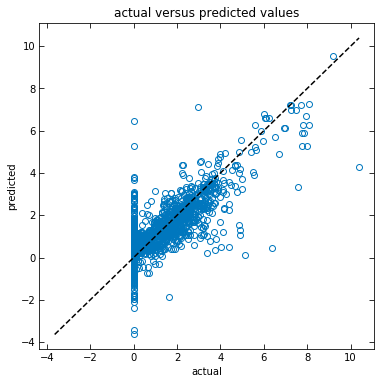

In [42]:
# Initialize a "LinearRegression" object. This will allow us to do a simple linear regression on the data
lr = LinearRegression()
# Call the fit function to perform the ML step
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R2 score =', lr.score(X_test, y_test))
utils.plot_act_vs_pred(y_test, y_pred)

In [ ]:
title = "linear regresion learning curve"
utils.plot_learning_curve(lr, title, X_train, y_train, ylim=(0.1, 1.01), cv=5, n_jobs=-1)

In [ ]:
# Initialize a 'RandomForestRegressor" object.
rf = RandomForestRegressor()
# Call the fit function to perform the ML step
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('R2 score =', rf.score(X_test, y_test))
utils.plot_act_vs_pred(y_test, y_pred)

In [ ]:
title = "random forest learning curve"
utils.plot_learning_curve(rf, title, X_train, y_train, ylim=(0.1, 1.01), cv=5, n_jobs=-1)